<a href="https://colab.research.google.com/github/NiKo-sid/Data_Vis/blob/main/Vis_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-17-bbab8f3c4a27>:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([uniform_data, gaussian_data], labels=["Uniform Data", "Gaussian Data"])


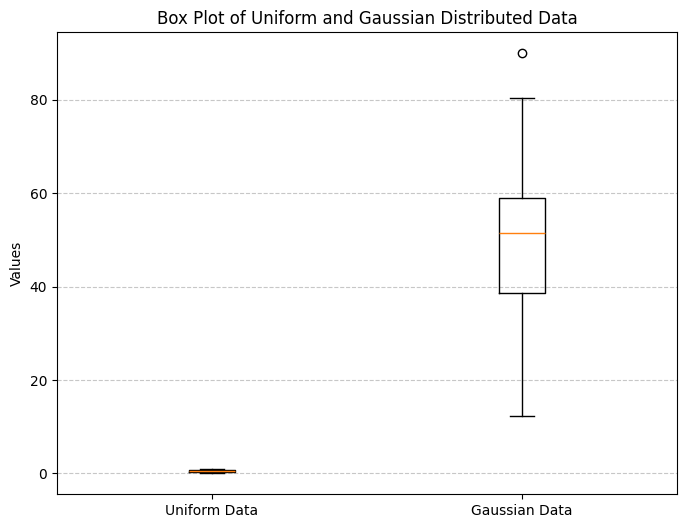

In [17]:
import numpy as np
import matplotlib.pyplot as plt

uniform_data = np.random.uniform(0, 1, 100)


gaussian_mean = 50
standard_deviation = 15
gaussian_data = np.random.normal(gaussian_mean, standard_deviation, 200)


plt.figure(figsize=(8, 6))
plt.boxplot([uniform_data, gaussian_data], labels=["Uniform Data", "Gaussian Data"])
plt.title("Box Plot of Uniform and Gaussian Distributed Data")
plt.ylabel("Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


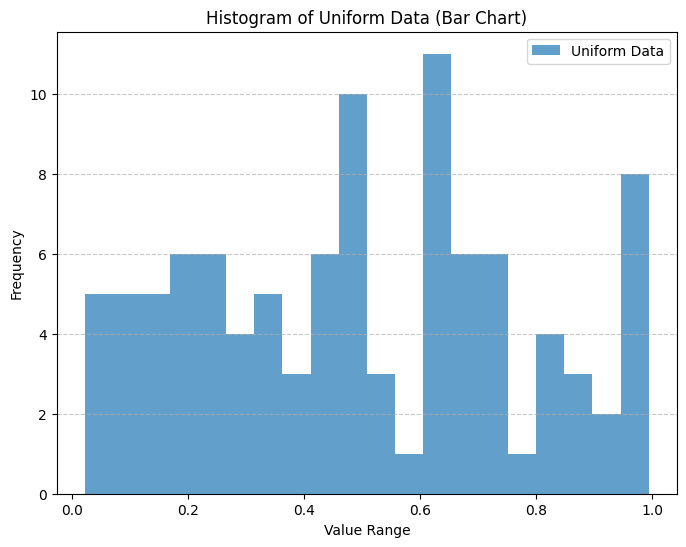

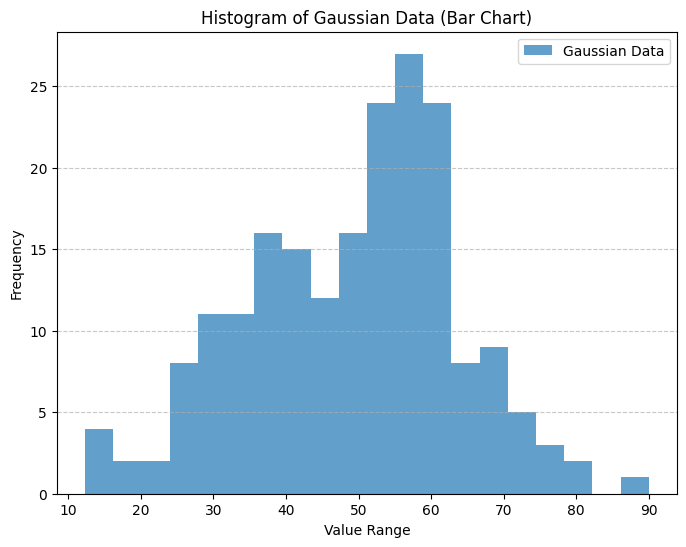

In [18]:

bins = 20


uniform_bin_edges = np.linspace(min(uniform_data), max(uniform_data), bins + 1)
gaussian_bin_edges = np.linspace(min(gaussian_data), max(gaussian_data), bins + 1)


uniform_histogram, _ = np.histogram(uniform_data, bins=uniform_bin_edges)
gaussian_histogram, _ = np.histogram(gaussian_data, bins=gaussian_bin_edges)


plt.figure(figsize=(8, 6))
plt.bar(uniform_bin_edges[:-1], uniform_histogram, width=np.diff(uniform_bin_edges), align='edge', alpha=0.7, label="Uniform Data")
plt.title("Histogram of Uniform Data (Bar Chart)")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(gaussian_bin_edges[:-1], gaussian_histogram, width=np.diff(gaussian_bin_edges), align='edge', alpha=0.7, label="Gaussian Data")
plt.title("Histogram of Gaussian Data (Bar Chart)")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

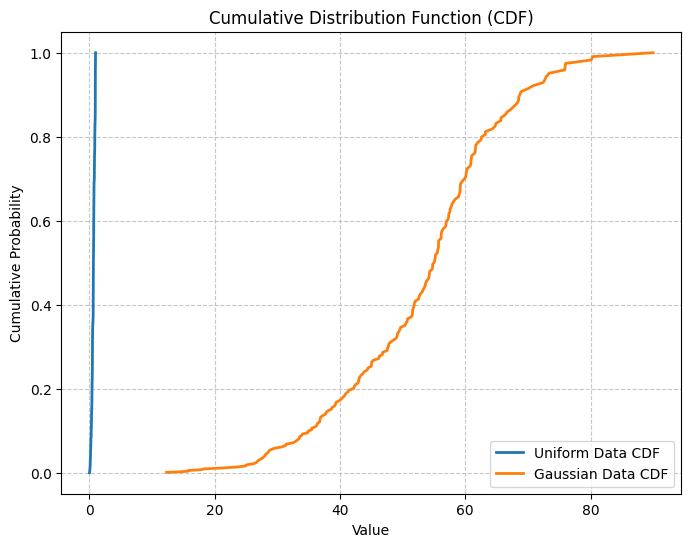

In [19]:

with open('data_arrays.bin', 'wb') as f:
    np.save(f, uniform_data)
    np.save(f, gaussian_data)


with open('data_arrays.bin', 'rb') as f:
    uniform_data_read = np.load(f)
    gaussian_data_read = np.load(f)

uniform_cdf = np.cumsum(np.sort(uniform_data_read)) / np.sum(uniform_data_read)
gaussian_cdf = np.cumsum(np.sort(gaussian_data_read)) / np.sum(gaussian_data_read)


plt.figure(figsize=(8, 6))
plt.plot(np.sort(uniform_data_read), uniform_cdf, label="Uniform Data CDF", linewidth=2)
plt.plot(np.sort(gaussian_data_read), gaussian_cdf, label="Gaussian Data CDF", linewidth=2)
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

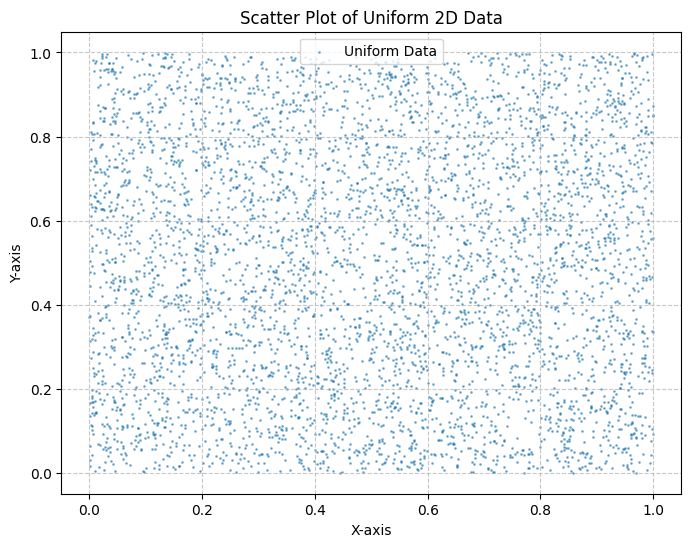

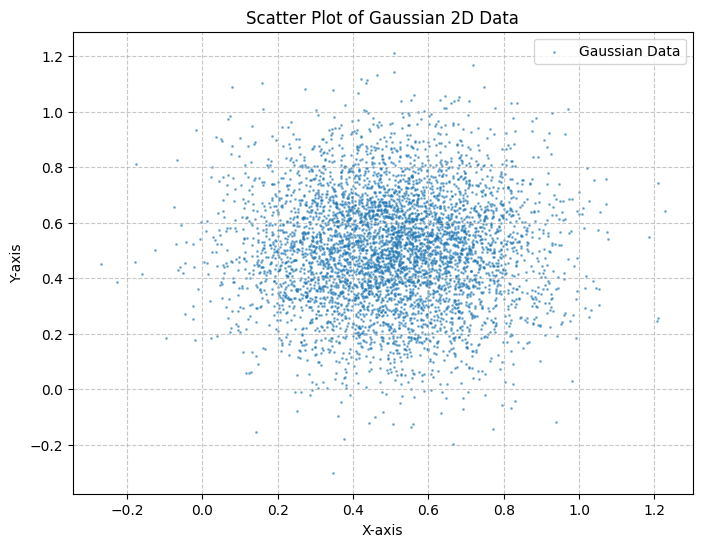

In [21]:

uniform_2d = np.random.uniform(0, 1, (5000, 2))


gaussian_2d = np.random.normal(0.5, 0.2, (5000, 2))


plt.figure(figsize=(8, 6))
plt.scatter(uniform_2d[:, 0], uniform_2d[:, 1], s=1, alpha=0.5, label="Uniform Data")
plt.title("Scatter Plot of Uniform 2D Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(gaussian_2d[:, 0], gaussian_2d[:, 1], s=1, alpha=0.5, label="Gaussian Data")
plt.title("Scatter Plot of Gaussian 2D Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


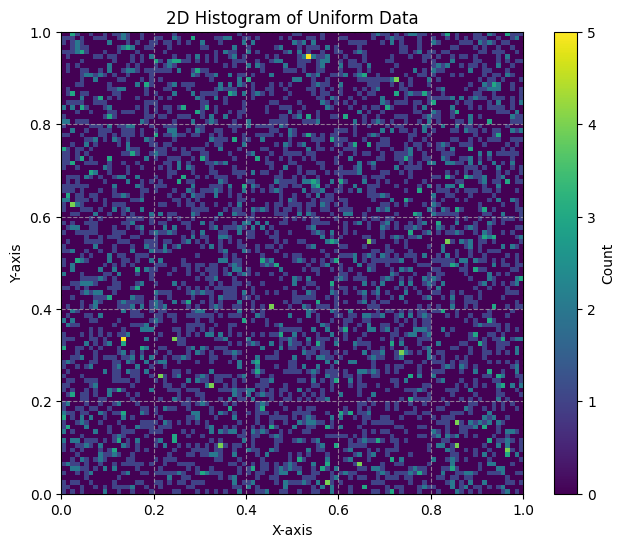

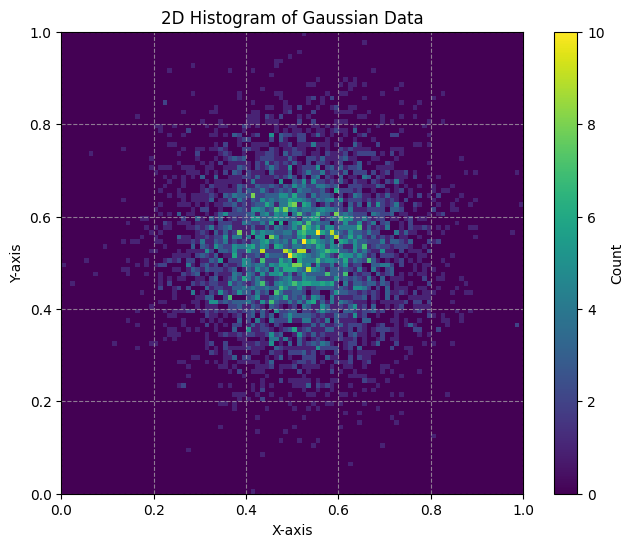

In [22]:

num_bins = 100

uniform_hist2d, xedges_u, yedges_u = np.histogram2d(uniform_2d[:, 0], uniform_2d[:, 1], bins=num_bins)
gaussian_hist2d, xedges_g, yedges_g = np.histogram2d(gaussian_2d[:, 0], gaussian_2d[:, 1], bins=num_bins)

plt.figure(figsize=(8, 6))
plt.imshow(uniform_hist2d.T, origin='lower', cmap='viridis', extent=[0, 1, 0, 1])
plt.title("2D Histogram of Uniform Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label="Count")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(gaussian_hist2d.T, origin='lower', cmap='viridis', extent=[0, 1, 0, 1])
plt.title("2D Histogram of Gaussian Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label="Count")
plt.grid(linestyle='--', alpha=0.7)
plt.show()


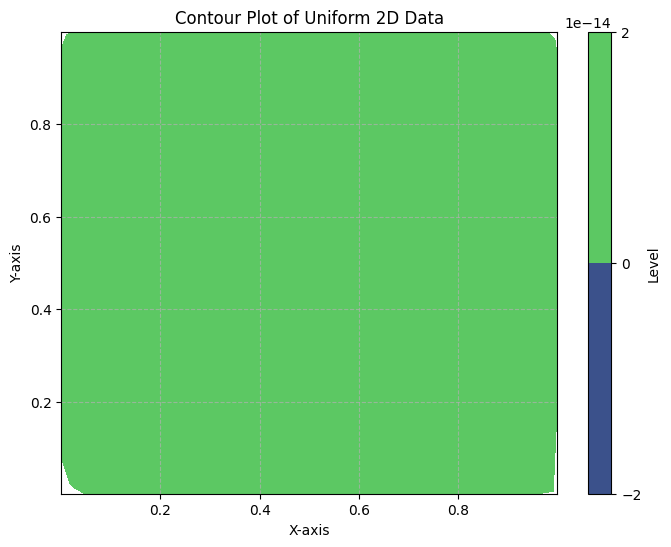

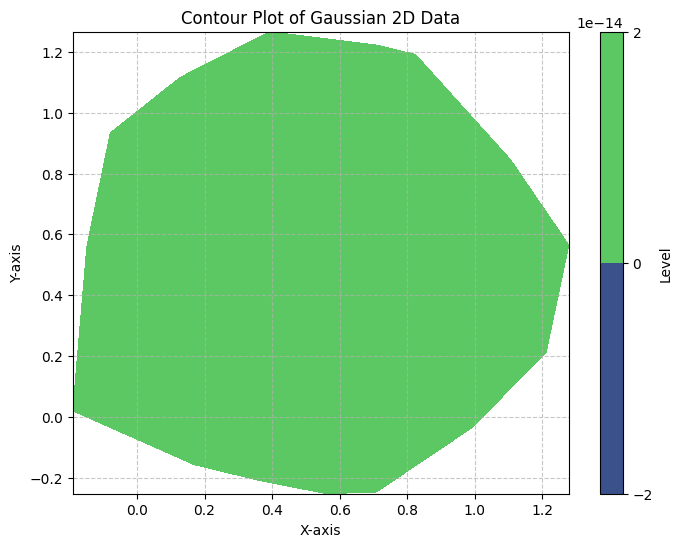

In [ ]:

plt.figure(figsize=(8, 6))
plt.tricontourf(uniform_2d[:, 0], uniform_2d[:, 1], np.zeros(uniform_2d.shape[0]), levels=10, cmap='viridis')
plt.title("Contour Plot of Uniform 2D Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label="Level")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
plt.tricontourf(gaussian_2d[:, 0], gaussian_2d[:, 1], np.zeros(gaussian_2d.shape[0]), levels=10, cmap='viridis')
plt.title("Contour Plot of Gaussian 2D Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label="Level")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

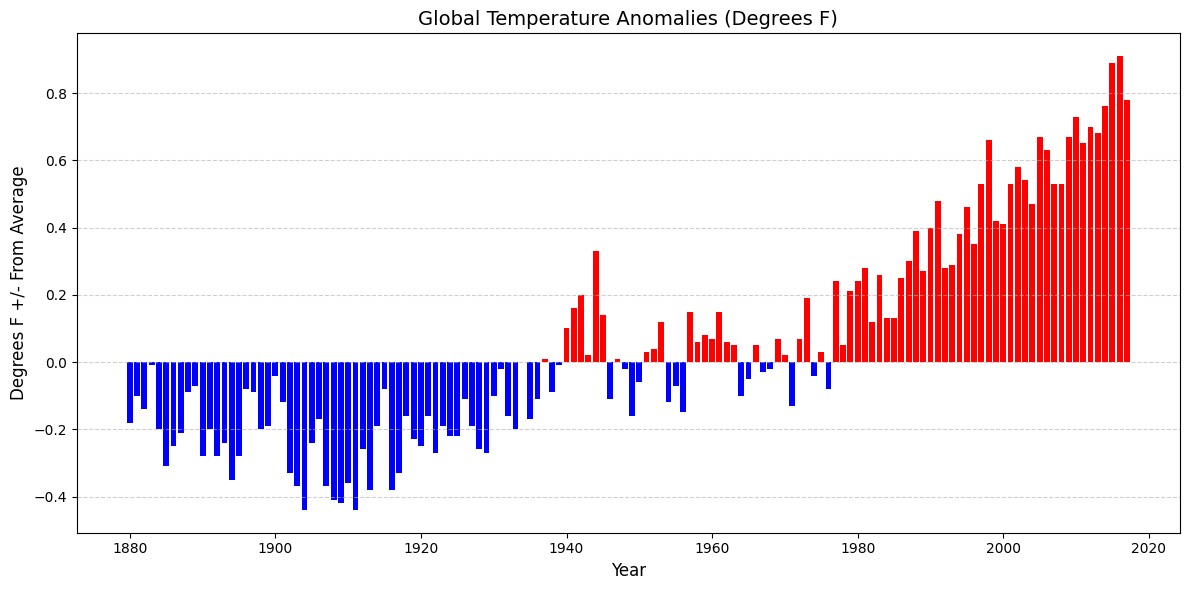

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'NOAA-Temperatures.csv'
data = pd.read_csv(file_path)


clean_data = pd.read_csv(file_path, skiprows=4)
clean_data.columns = ["Year", "Degrees_F"]


clean_data = clean_data.dropna()
clean_data["Year"] = pd.to_numeric(clean_data["Year"], errors='coerce')
clean_data["Degrees_F"] = pd.to_numeric(clean_data["Degrees_F"], errors='coerce')
clean_data = clean_data.dropna()


plt.figure(figsize=(12, 6))


colors = ['red' if value > 0 else 'blue' for value in clean_data["Degrees_F"]]


plt.bar(clean_data["Year"], clean_data["Degrees_F"], color=colors)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Degrees F +/- From Average", fontsize=12)
plt.title("Global Temperature Anomalies (Degrees F)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()


                    Cereal Manufacturer Type  Calories  Protein  Fat  Sodium  \
0  Apple Cinnamon Cheerios            G    C       110        2    2     180   
1                  Basic 4            G    C       130        3    2     210   
2                 Cheerios            G    C       110        6    2     290   
3    Cinnamon Toast Crunch            G    C       120        1    3     210   
4                 Clusters            G    C       110        3    2     140   

   Fiber  Carbohydrates  Sugars  Shelf  Potassium  Vitamins  Weight  Cups  
0    1.5           10.5      10      1         70        25    1.00  0.75  
1    2.0           18.0       8      3        100        25    1.33  0.75  
2    2.0           17.0       1      1        105        25    1.00  1.25  
3    0.0           13.0       9      2         45        25    1.00  0.75  
4    2.0           13.0       7      3        105        25    1.00  0.50  


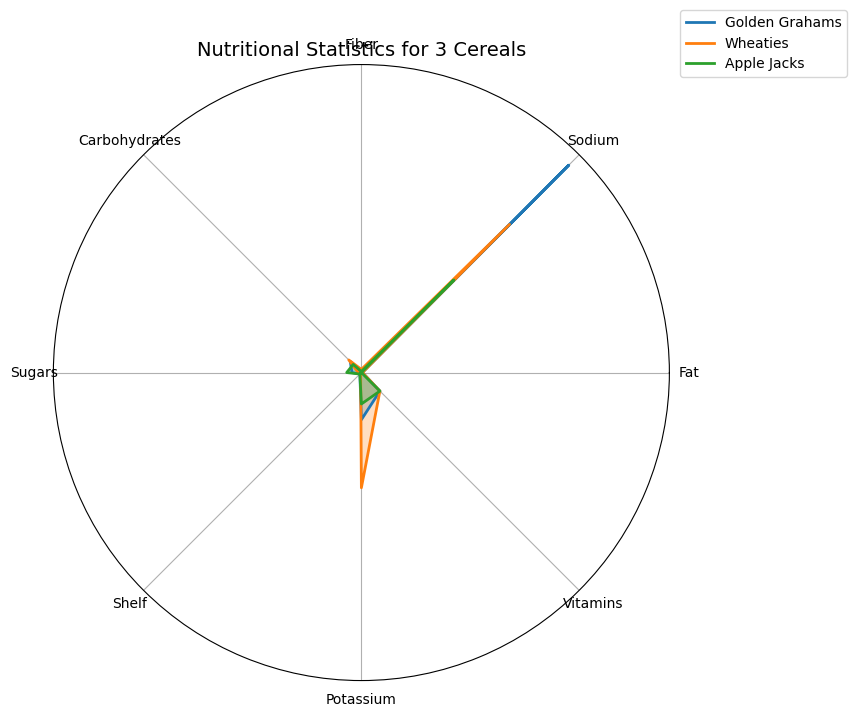

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = 'Breakfast-Cereals.xls'
data = pd.read_excel(file_path)


print(data.head())


cereals = ["Golden Grahams", "Wheaties", "Apple Jacks"]
stats = ["Fat", "Sodium", "Fiber", "Carbohydrates", "Sugars", "Shelf", "Potassium", "Vitamins"]


filtered_data = data[data['Cereal'].isin(cereals)][stats]


labels = stats
num_vars = len(labels)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, cereal in enumerate(cereals):
    values = filtered_data.iloc[idx].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cereal, linewidth=2)
    ax.fill(angles, values, alpha=0.25)


ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Nutritional Statistics for 3 Cereals", fontsize=14)
plt.show()


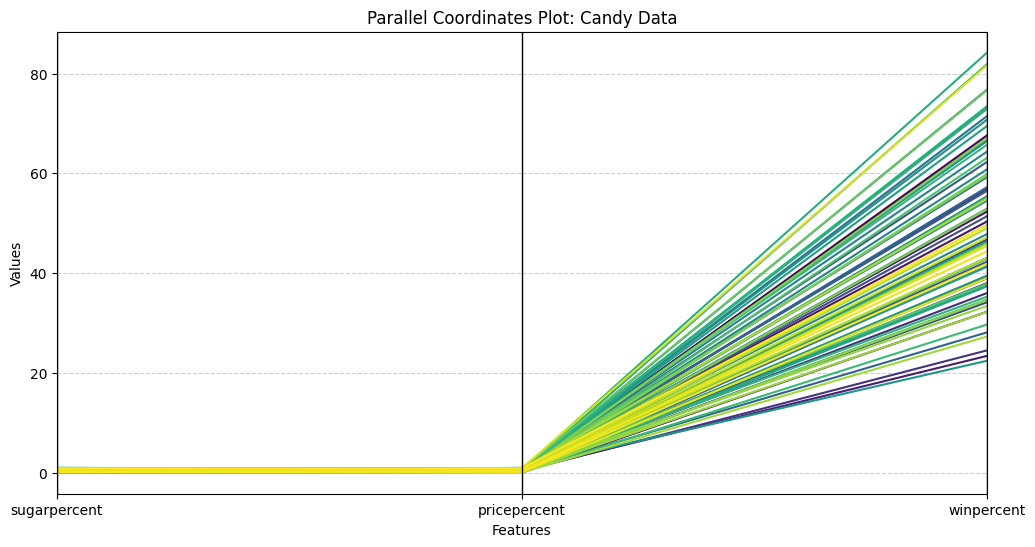

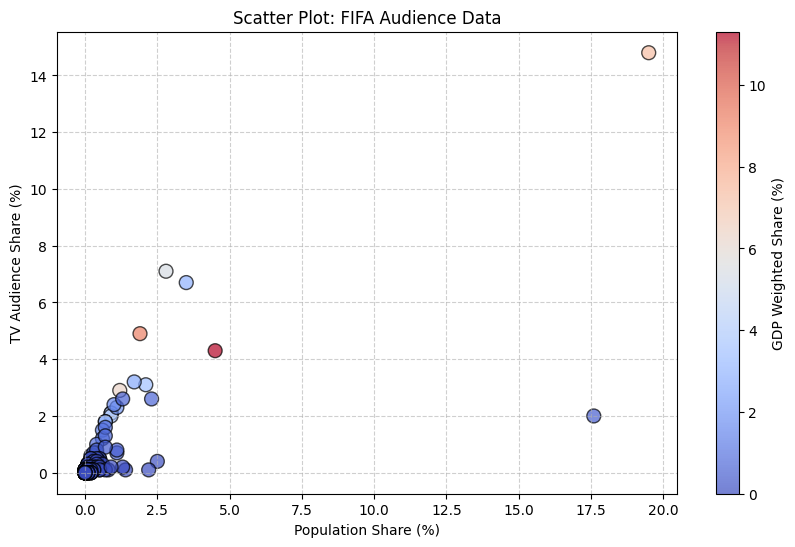

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


candy_file_path = 'candy-data.csv'
fifa_file_path = 'fifa_countries_audience.csv'

candy_data = pd.read_csv(candy_file_path)
fifa_data = pd.read_csv(fifa_file_path)


plt.figure(figsize=(12, 6))
parallel_coordinates(
    candy_data[['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']],
    class_column='competitorname',
    colormap='viridis',
)
plt.title("Parallel Coordinates Plot: Candy Data")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend([], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(
    fifa_data['population_share'],
    fifa_data['tv_audience_share'],
    c=fifa_data['gdp_weighted_share'],
    cmap='coolwarm',
    s=100,
    alpha=0.7,
    edgecolor='k',
)
plt.title("Scatter Plot: FIFA Audience Data")
plt.xlabel("Population Share (%)")
plt.ylabel("TV Audience Share (%)")
plt.colorbar(label="GDP Weighted Share (%)")
plt.grid(alpha=0.6, linestyle='--')
plt.show()


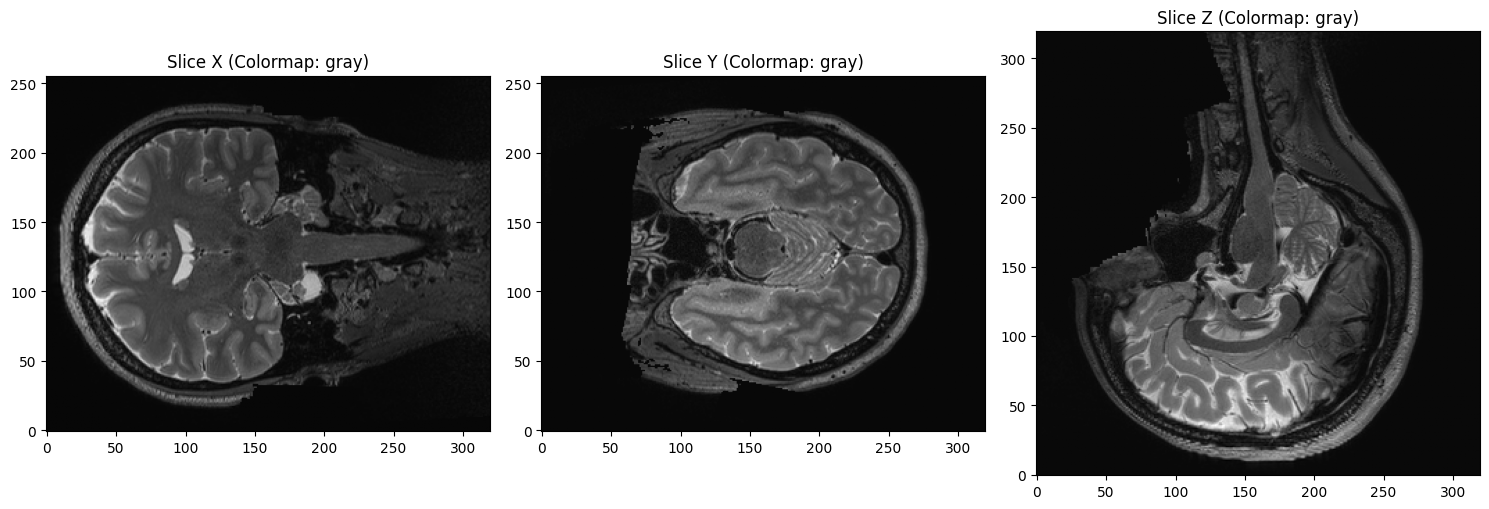

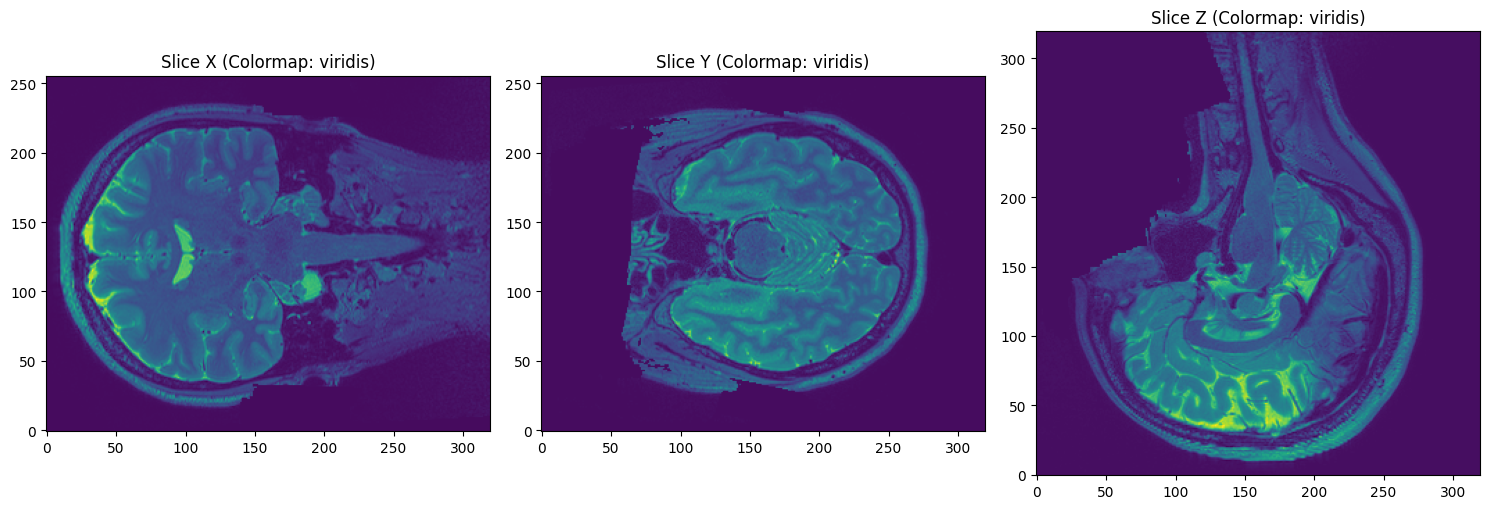

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np


file_path = 'T2.nii.gz'
mri_data = nib.load(file_path)


mri_array = mri_data.get_fdata()


x_dim, y_dim, z_dim = mri_array.shape

slice_x = mri_array[x_dim // 2, :, :]
slice_y = mri_array[:, y_dim // 2, :]
slice_z = mri_array[:, :, z_dim // 2]


colormaps = ['gray', 'viridis']
for cmap in colormaps:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(slice_x.T, cmap=cmap, origin='lower')
    axes[0].set_title(f"Slice X (Colormap: {cmap})")
    axes[1].imshow(slice_y.T, cmap=cmap, origin='lower')
    axes[1].set_title(f"Slice Y (Colormap: {cmap})")
    axes[2].imshow(slice_z.T, cmap=cmap, origin='lower')
    axes[2].set_title(f"Slice Z (Colormap: {cmap})")
    plt.tight_layout()
    plt.show()


plt.imsave('slice_x_gray.png', slice_x.T, cmap='gray')
plt.imsave('slice_y_gray.png', slice_y.T, cmap='gray')
plt.imsave('slice_z_gray.png', slice_z.T, cmap='gray')
